# **Stock Portfolio Optimization using Genetic Algorithm**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from functools import reduce

In [ ]:
files=['hdfc.csv','itc.csv','l&t.csv','m&m.csv','sunpha.csv','tcs.csv']
dfs=[]

for file in files:
    temp=pd.read_csv(file)
    temp.columns=['Date',file.replace('.csv','')]
    dfs.append(temp)

stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(stocks.shape)
stocks.head()

(37, 7)


,Date,hdfc,itc,l&t,m&m,sunpha,tcs
0,June 2018,2108.05,266.05,1271.3,896.80,560.55,1847.20
1,May 2018,2136.15,271.60,1367.6,923.50,480.15,1744.80
2,Apr 2018,1944.60,281.45,1400.6,872.65,528.15,1765.70
3,Mar 2018,1891.45,255.90,1311.9,740.20,495.40,1424.65
4,Feb 2018,1883.80,265.10,1319.1,728.75,535.35,1519.13


In [ ]:
def hist_return(months):
    idx=[]
    df=pd.DataFrame()
    for mon in months:
        temp=(stocks.iloc[0,1:] - stocks.iloc[mon,1:])/(stocks.iloc[mon,1:])
        idx.append(str(mon)+'_mon_return')
        df=pd.concat([df, temp.to_frame().T], ignore_index=True)
    df.index=idx
    return df

In [ ]:
hist_stock_returns=hist_return([3,6,12,24,36])
hist_stock_returns

,hdfc,itc,l&t,m&m,sunpha,tcs
3_mon_return,0.114515,0.039664,-0.030947,0.211564,0.13151,0.296599
6_mon_return,0.125163,0.011212,0.011417,0.194062,-0.017957,0.368094
12_mon_return,0.275866,-0.178478,0.129783,0.330899,0.010911,0.562537
24_mon_return,0.792712,0.084237,0.274461,0.255179,-0.265911,0.44833
36_mon_return,0.974847,0.266844,0.069614,0.399938,-0.358785,0.447535


In [ ]:
gene = np.random.rand()
gene

0.6126990658182521

In [ ]:
def chromosome(n):
    ''' Generates set of random numbers whose sum is equal to 1
        Input: Number of stocks.
        Output: Array of random numbers'''
    ch = np.random.rand(n)
    return ch/sum(ch)

In [ ]:
child=chromosome(6)
print(child,sum(child))

[0.05335468 0.28069502 0.11079183 0.25819084 0.03731802 0.25964961] 0.9999999999999998


In [ ]:
n=6
pop_size=100

population = np.array([chromosome(n) for _ in range(pop_size)])
print(population.shape)
print(population)

(100, 6)
[[2.15666022e-01 2.29811779e-02 1.18635437e-01 1.87930399e-01
  2.29966486e-01 2.24820478e-01]
 [1.17440661e-01 3.00557855e-02 3.33735476e-01 5.28171397e-02
  2.18636585e-01 2.47314353e-01]
 [1.69609748e-02 3.45055437e-01 8.70835958e-02 1.66098854e-01
  3.47564853e-01 3.72362859e-02]
 [1.64497184e-01 3.06108749e-02 2.85715105e-01 2.84513627e-01
  1.13141676e-01 1.21521533e-01]
 [3.06606516e-01 4.85193656e-02 2.69284910e-02 2.16879011e-01
  7.27481566e-02 3.28318459e-01]
 [6.51166852e-02 1.39885634e-02 2.16143248e-01 1.62482170e-01
  2.88080397e-01 2.54188936e-01]
 [9.08422388e-02 2.85125392e-01 1.65517890e-01 1.18799974e-01
  2.42753035e-01 9.69614703e-02]
 [1.81896834e-01 9.49491786e-02 1.47090073e-01 3.01707362e-01
  2.71654192e-01 2.70236076e-03]
 [1.16354800e-01 1.75926732e-01 2.81687048e-01 2.37076331e-01
  1.18064638e-01 7.08904513e-02]
 [7.03821375e-02 1.84276571e-01 2.40249830e-01 7.45402831e-02
  2.71142136e-01 1.59409042e-01]
 [2.74549840e-01 5.77843580e-02 1.3956250

In [ ]:
# Converting the datatype from object to float64
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print(hist_stock_returns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3_mon_return to 36_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hdfc    5 non-null      object
 1   itc     5 non-null      object
 2   l&t     5 non-null      object
 3   m&m     5 non-null      object
 4   sunpha  5 non-null      object
 5   tcs     5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3_mon_return to 36_mon_return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hdfc    5 non-null      float64
 1   itc     5 non-null      float64
 2   l&t     5 non-null      float64
 3   m&m     5 non-null      float64
 4   sunpha  5 non-null      float64
 5   tcs     5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes
None


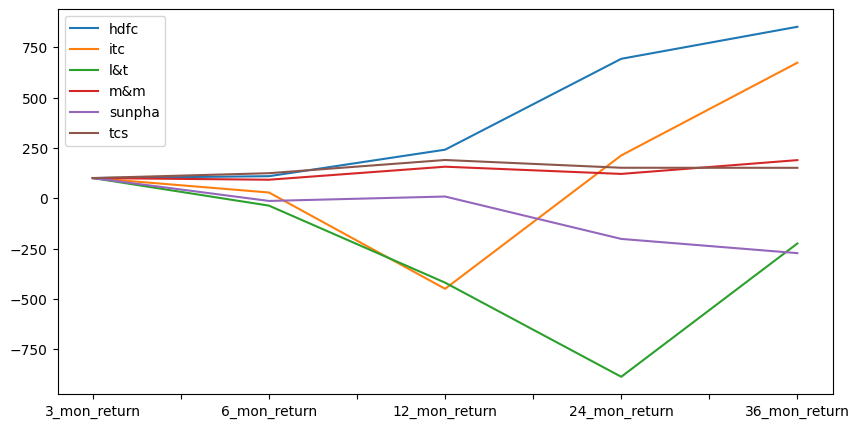

In [ ]:
# Plotting Normalized returns
(hist_stock_returns / hist_stock_returns.iloc[0] * 100).plot(figsize=(10, 5))
plt.show()

In [ ]:
cov_hist_return=hist_stock_returns.cov()

print(cov_hist_return)

for i in range(6):
    cov_hist_return.iloc[i][i]=0

cov_hist_return

            hdfc       itc       l&t       m&m    sunpha       tcs
hdfc    0.160272  0.045393  0.027916  0.024127 -0.079078  0.014362
itc     0.045393  0.025467 -0.000718  0.004381 -0.023178 -0.005554
l&t     0.027916 -0.000718  0.014206  0.002510 -0.013841  0.007330
m&m     0.024127  0.004381  0.002510  0.007412 -0.011042  0.005700
sunpha -0.079078 -0.023178 -0.013841 -0.011042  0.041781 -0.007211
tcs     0.014362 -0.005554  0.007330  0.005700 -0.007211  0.009923


,hdfc,itc,l&t,m&m,sunpha,tcs
hdfc,0.000000,0.045393,0.027916,0.024127,-0.079078,0.014362
itc,0.045393,0.000000,-0.000718,0.004381,-0.023178,-0.005554
l&t,0.027916,-0.000718,0.000000,0.002510,-0.013841,0.007330
m&m,0.024127,0.004381,0.002510,0.000000,-0.011042,0.005700
sunpha,-0.079078,-0.023178,-0.013841,-0.011042,0.000000,-0.007211
tcs,0.014362,-0.005554,0.007330,0.005700,-0.007211,0.000000


In [ ]:
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

hdfc      0.456621
itc       0.044696
l&t       0.090865
m&m       0.278328
sunpha   -0.100047
tcs       0.424619
dtype: float64

In [ ]:
sd_hist_return=hist_stock_returns.std()
sd_hist_returnsd_hist_return=hist_stock_returns.std()
sd_hist_return

hdfc      0.400340
itc       0.159583
l&t       0.119189
m&m       0.086091
sunpha    0.204405
tcs       0.099615
dtype: float64

In [ ]:
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

In [ ]:
mean_portfolio_return(population[0])

0.23504662247385505

In [ ]:
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    for i in range(6):
        for j in range(6):
            temp=cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

In [ ]:
var_portfolio_return(population[0])

0.006284670702418878

In [ ]:
rf= 0.0697

In [ ]:
def fitness_fuction(child):
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    return (mean_portfolio_return(child)-rf)/np.sqrt(var_portfolio_return(child))

In [ ]:
fitness_fuction(population[7])

1.4328364801176114

In [ ]:
def Select_canonical_population(population, frac=0.3):
    ''' Select canonical population from the total population based on fitness function values.
        Input: Population and fraction of population to be considered as canonical.
        Output: Canonical population.'''
    population = sorted(population,key = lambda x: fitness_fuction(x),reverse=True)
    percentage_canonical_idx = int(np.floor(len(population)* frac))
    return population[:percentage_canonical_idx]

In [ ]:
print(len(Select_canonical_population(population, frac=0.3)))
Select_canonical_population(population, frac=0.3)

30


[array([0.00556482, 0.04340047, 0.12345841, 0.31859287, 0.18394723,
        0.32503619]),
 array([0.07825844, 0.20361323, 0.16282276, 0.02751333, 0.178627  ,
        0.34916523]),
 array([0.07846774, 0.1768291 , 0.14313115, 0.16099506, 0.17706068,
        0.26351626]),
 array([0.06511669, 0.01398856, 0.21614325, 0.16248217, 0.2880804 ,
        0.25418894]),
 array([0.08665773, 0.03148086, 0.23562644, 0.16113071, 0.26187982,
        0.22322443]),
 array([0.07300033, 0.04077205, 0.21897116, 0.2015792 , 0.28902408,
        0.17665318]),
 array([0.14242329, 0.0946029 , 0.11489584, 0.22040154, 0.22979375,
        0.19788268]),
 array([0.17559214, 0.03916055, 0.10269657, 0.27900496, 0.04658513,
        0.35696064]),
 array([0.21566602, 0.02298118, 0.11863544, 0.1879304 , 0.22996649,
        0.22482048]),
 array([0.0469263 , 0.00070327, 0.17235159, 0.11400702, 0.33866366,
        0.32734816]),
 array([0.1529844 , 0.08747229, 0.13982507, 0.24264954, 0.22979699,
        0.14727171]),
 array([0.

In [ ]:
[fitness_fuction(x) for x in population][:3]

[2.085710678079565, 1.7875494177145588, -0.3712270267199789]

In [ ]:
def mutation(parent):
    ''' Randomy choosen elements of a chromosome are swapped
        Input: Parent
        Output: Offspring (1D Array)'''
    child=parent.copy()
    n=np.random.choice(range(6),2)
    while (n[0]==n[1]):
        n=np.random.choice(range(6),2)
    child[n[0]],child[n[1]]=child[n[1]],child[n[0]]
    return child

In [ ]:
mutation(population[1]),population[1]

(array([0.11744066, 0.05281714, 0.33373548, 0.03005579, 0.21863658,
        0.24731435]),
 array([0.11744066, 0.03005579, 0.33373548, 0.05281714, 0.21863658,
        0.24731435]))

In [ ]:
def Linear_crossover(parent1,parent2):
    ''' The oﬀsprings are created according to the equation:
            Off spring A = α ∗ Parent1 + (1 −α) ∗ Parent2
            Off spring B = (1 −α) ∗ Parent1 + α ∗ Parent2

                Where α is a random number between 0 and 1.
        Input: 2 Parents
        Output: 2 Children (1d Array)'''
    alpha = np.random.rand()
    child1 = alpha * parent1 + (1-alpha) * parent2
    child2 = (1-alpha) * parent1 + alpha * parent2
    return child1,child2

In [ ]:
Linear_crossover(population[2],population[3])

(array([0.09822459, 0.17185794, 0.19649074, 0.23132225, 0.2184435 ,
        0.08366098]),
 array([0.08323357, 0.20380837, 0.17630796, 0.21929023, 0.24226303,
        0.07509683]))

In [ ]:
for i in population[:30]:
    for j in population[:30]:
        print(Linear_crossover(i,j))

(array([0.21566602, 0.02298118, 0.11863544, 0.1879304 , 0.22996649,
       0.22482048]), array([0.21566602, 0.02298118, 0.11863544, 0.1879304 , 0.22996649,
       0.22482048]))
(array([0.20805842, 0.02352911, 0.13529503, 0.17746582, 0.22908898,
       0.22656264]), array([0.12504826, 0.02950785, 0.31707588, 0.06328172, 0.21951409,
       0.24557219]))
(array([0.2098935 , 0.03233767, 0.11771883, 0.18729618, 0.2333828 ,
       0.21937102]), array([0.0227335 , 0.33569895, 0.0880002 , 0.16673308, 0.34414854,
       0.04268574]))
(array([0.17250666, 0.0294166 , 0.25956207, 0.26939542, 0.1314283 ,
       0.13769095]), array([0.20765655, 0.02417546, 0.14478847, 0.2030486 , 0.21167986,
       0.20865106]))
(array([0.30622968, 0.04841354, 0.02730851, 0.21675905, 0.07339964,
       0.32788958]), array([0.21604286, 0.023087  , 0.11825542, 0.18805036, 0.229315  ,
       0.22524935]))
(array([0.06867525, 0.01420112, 0.21383844, 0.1630837 , 0.28670675,
       0.25349475]), array([0.21210746, 0.02276

In [ ]:
def next_generation(pop_size,elite,crossover=Linear_crossover):
    ''' Generates new population from elite population with mutation probability as 0.4 and crossover as 0.6.
        Over the final stages, mutation probability is decreased to 0.1.
        Input: Population Size and elite population.
        Output: Next generation population (2D Array).'''
    new_population=[]
    elite_range=range(len(elite))
#     print(elite_range)
    while len(new_population) < pop_size:
        if len(new_population) > 2*pop_size/3: # In the final stages mutation frequency is decreased.
            mutate_or_crossover = np.random.choice([0, 1], p=[0.9, 0.1])
        else:
            mutate_or_crossover = np.random.choice([0, 1], p=[0.4, 0.6])
#         print(mutate_or_crossover)
        if mutate_or_crossover:
            indx=np.random.choice(elite_range)
            new_population.append(mutation(elite[indx]))
        else:
            p1_idx,p2_idx=np.random.choice(elite_range,2)
            c1,c2=crossover(elite[p1_idx],elite[p2_idx])
            chk=0
            for gene in range(6):
                if c1[gene]<0:
                    chk+=1
                else:
                    chk+=0
            if chk>0:
                p1_idx,p2_idx=np.random.choice(elite_range,2)
                c1,c2=crossover(elite[p1_idx],elite[p2_idx])
            new_population.extend([c1,c2])
    return new_population

(array([0.19156486, 0.17336694, 0.14419745, 0.10884356, 0.15436008,
       0.22766711]), array([0.22220107, 0.16588276, 0.08552207, 0.10109127, 0.19351065,
       0.23179218]))
(array([0.1651146 , 0.17437889, 0.10583547, 0.16355775, 0.22437452,
       0.16673877]), array([0.11056614, 0.18366675, 0.14434908, 0.21294193, 0.23158786,
       0.11688824]))
(array([0.23589352, 0.17226249, 0.05429984, 0.11829895, 0.21620783,
       0.20303737]), array([0.2276729 , 0.20240855, 0.05558264, 0.18019367, 0.22074656,
       0.11339567]))
(array([0.18810476, 0.10340993, 0.20143756, 0.19472319, 0.12333084,
       0.18899372]), array([0.22070412, 0.14103405, 0.10641365, 0.13174206, 0.1821221 ,
       0.21798401]))
(array([0.21021937, 0.23345243, 0.04990707, 0.01807931, 0.20046988,
       0.28787193]), array([0.23256185, 0.1773451 , 0.05300155, 0.07984336, 0.21157193,
       0.24567622]))
(array([0.24968215, 0.26866493, 0.03815612, 0.065526  , 0.17731671,
       0.20065408]), array([0.24006428, 0.17481

In [ ]:
canonical=Select_canonical_population(population)
next_generation(100,canonical)[:3]

[array([0.03856731, 0.18497271, 0.21262743, 0.14536809, 0.20490052,
        0.21356394]),
 array([0.05212052, 0.13078495, 0.20585803, 0.24675823, 0.26139942,
        0.10307884]),
 array([0.05782591, 0.106189  , 0.20944118, 0.23441309, 0.26894784,
        0.12318297])]

In [ ]:
canonical=Select_canonical_population(population)
next_generation(100,canonical,Linear_crossover)[:3]

[array([0.0469263 , 0.17235159, 0.00070327, 0.11400702, 0.33866366,
        0.32734816]),
 array([0.06178729, 0.01073896, 0.16694892, 0.12492639, 0.32337741,
        0.31222104]),
 array([0.1644266 , 0.08005173, 0.12963464, 0.20034239, 0.217801  ,
        0.20774364])]

In [ ]:
n=6
pop_size=100

# Initial population
population = np.array([chromosome(n) for _ in range(pop_size)])

# Get initial canonical population
canonical = Select_canonical_population(population)

iteration=0
Expected_returns=0
Expected_risk=1

while (Expected_returns < 0.30 and Expected_risk > 0.0005) or iteration <= 40:
    print('Iteration:',iteration)
    population = next_generation(100,canonical,Linear_crossover)
    canonical = Select_canonical_population(population)
    Expected_returns=mean_portfolio_return(canonical[0])
    Expected_risk=var_portfolio_return(canonical[0])
    print('Expected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))
    iteration+=1
    if(iteration>40):
        break;


print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',canonical[0][i]) for i in list(range(6))]

Iteration: 0
Expected returns of 0.2752331159167194 with risk of 0.005110528763397911

Iteration: 1
Expected returns of 0.16477029841135504 with risk of 0.0009683188835601787

Iteration: 2
Expected returns of 0.19692592213700164 with risk of 0.0016950409754112172

Iteration: 3
Expected returns of 0.16526894355611726 with risk of 0.0008484416134748323

Iteration: 4
Expected returns of 0.19199386474258723 with risk of 0.0011466895437335627

Iteration: 5
Expected returns of 0.18851529779494924 with risk of 0.0010843541162011924

Iteration: 6
Expected returns of 0.17999103648180353 with risk of 0.000828133088434377

Iteration: 7
Expected returns of 0.18127029915164594 with risk of 0.0008616717332040535

Iteration: 8
Expected returns of 0.15145097458812862 with risk of 0.0004740763461142149

Iteration: 9
Expected returns of 0.1543315920006568 with risk of 0.0005072867542979592

Iteration: 10
Expected returns of 0.1616609978574975 with risk of 0.000607019898777054

Iteration: 11
Expected ret

[None, None, None, None, None, None]

In [ ]:
print('Portfolio of stocks after all the iterations:\n')
[print(hist_stock_returns.columns[i],':',canonical[0][i]) for i in list(range(6))]

print('\nExpected returns of {} with risk of {}\n'.format(Expected_returns,Expected_risk))

Portfolio of stocks after all the iterations:

hdfc : 0.042299283519609154
itc : 0.1792130202259109
l&t : 0.10833565154337385
m&m : 0.15801149899090156
sunpha : 0.26611150855601556
tcs : 0.2460290371641889

Expected returns of 0.15899290946566877 with risk of 0.0005697901680473405



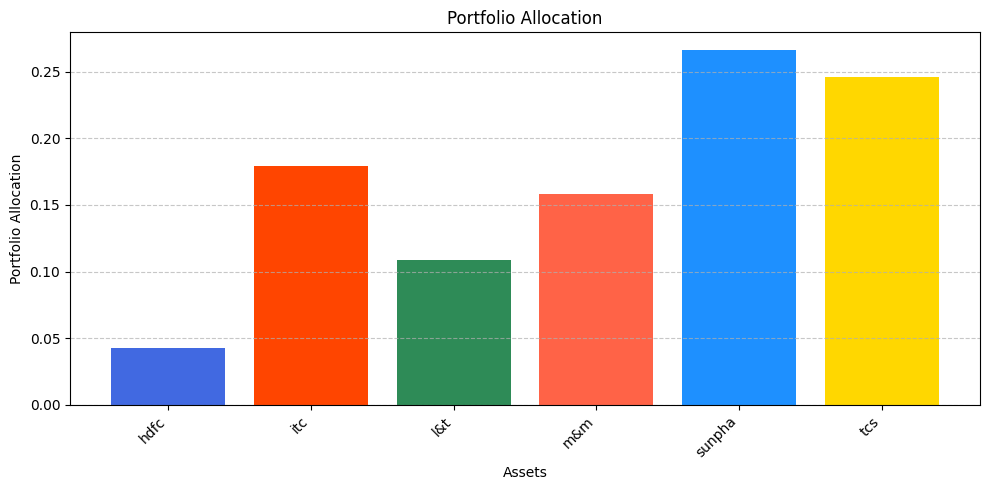

In [ ]:
def plot_portfolio_allocation(allocation, asset_names):
    plt.figure(figsize=(10, 5))
    colors = ['royalblue', 'orangered', 'seagreen', 'tomato', 'dodgerblue', 'gold']
    plt.bar(asset_names, allocation, color=colors)
    plt.xlabel('Assets')
    plt.ylabel('Portfolio Allocation')
    plt.title('Portfolio Allocation')
    plt.xticks(rotation=45, ha="right")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

asset_names = list(hist_stock_returns.columns)
plot_portfolio_allocation(canonical[0], asset_names)
